In [3]:
# ============================================
# 1. Importación de librerías
# ============================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# ============================================
# 2. Cargar los datos
# ============================================
df = pd.read_excel("exportados/robos_tot_final.xlsx")

# ============================================
# 3. Limpiar y preparar la variable objetivo
# ============================================
# Convertimos VIOLENCIA a 0/1
df["VIOLENCIA"] = df["VIOLENCIA"].map({"NO": 0, "SI": 1})

# ============================================
# 4. Seleccionar variables predictoras
# ============================================
features = ["TIPO", "DISTRITO", "CUADRANTE", "DIA", "MES", "ESTACION", "AÑO",
            "LATITUD", "LONGITUD"]

X = df[features]
y = df["VIOLENCIA"]

# ============================================
# 5. Identificar variables categóricas y numéricas
# ============================================
categoricas = ["TIPO", "DISTRITO", "ESTACION"]
numericas = ["CUADRANTE", "DIA", "MES", "AÑO", "LATITUD", "LONGITUD"]

# ============================================
# 6. Preprocesamiento (One-Hot Encoding)
# ============================================
preproceso = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categoricas),
    ],
    remainder="passthrough"
)

# ============================================
# 7. Pipeline del modelo
# ============================================
modelo = Pipeline(steps=[
    ("prepro", preproceso),
    ("log_reg", LogisticRegression(max_iter=300))
])

# ============================================
# 8. Separar en entrenamiento y prueba
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# ============================================
# 9. Entrenar el modelo
# ============================================
modelo.fit(X_train, y_train)

# ============================================
# 10. Evaluación del modelo
# ============================================
y_pred = modelo.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Matriz de confusión:
[[6729  283]
 [1467  299]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      7012
           1       0.51      0.17      0.25      1766

    accuracy                           0.80      8778
   macro avg       0.67      0.56      0.57      8778
weighted avg       0.76      0.80      0.76      8778



/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


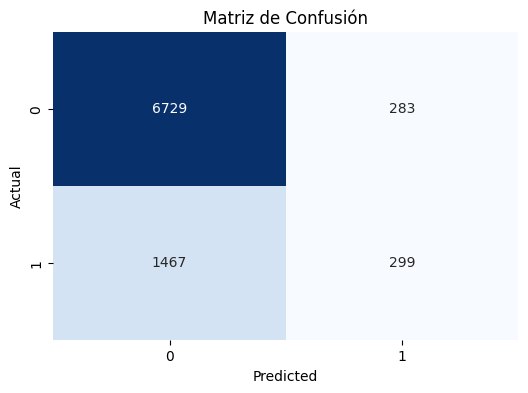

In [4]:
# graficar la matriz de confusión
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

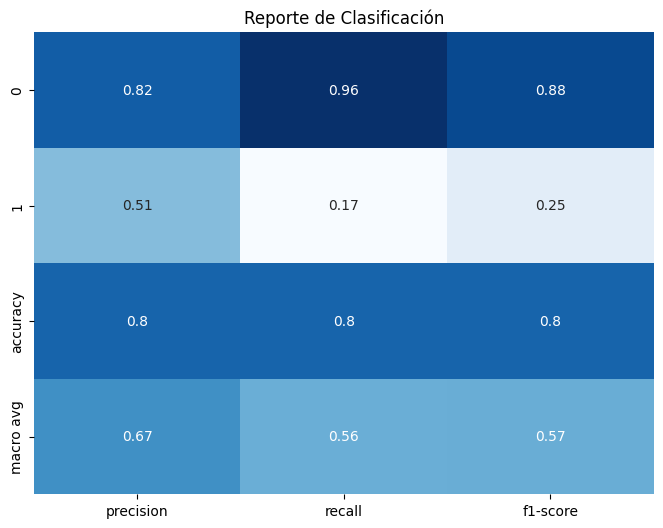

In [5]:
# graficar el reporte de clasificación
rc = classification_report(y_test, y_pred, output_dict=True)
rc_df = pd.DataFrame(rc).transpose()
plt.figure(figsize=(8,6))
sns.heatmap(rc_df.iloc[:-1, :-1], annot=True, cmap='Blues', cbar=False)
plt.title('Reporte de Clasificación')
plt.show()

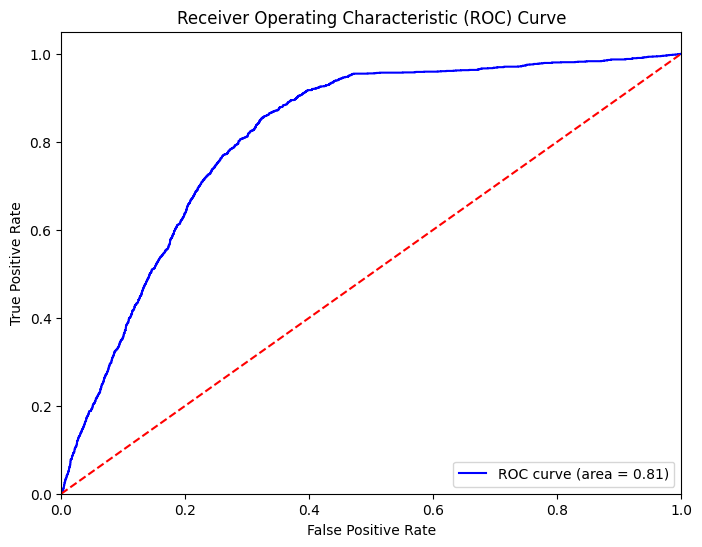

In [6]:
# visualizar el modelo (ROC curve)
from sklearn.metrics import roc_curve, auc
y_prob = modelo.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()